In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('D:/news/train.csv')
test = pd.read_csv('D:/news/test.csv')

In [7]:
train.loc[:,1:10]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub


In [3]:
train = train.select_dtypes(exclude=['object'])
train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

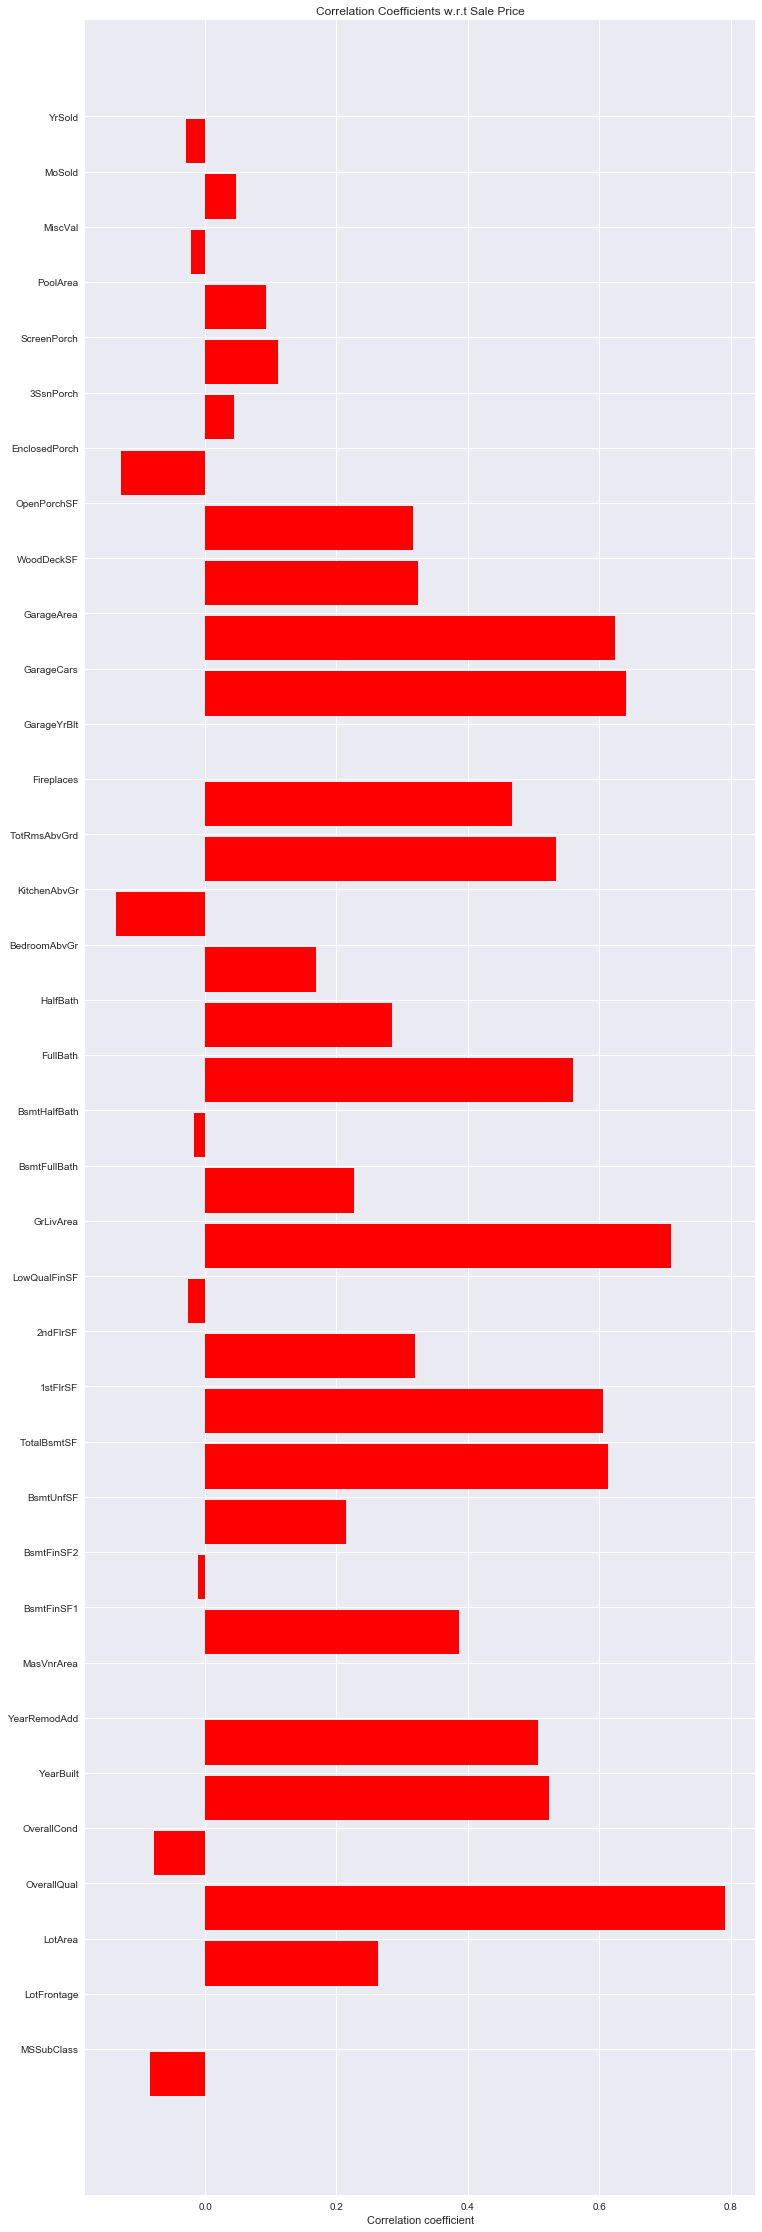

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values,train.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [3]:
## Converting some of the numerical variables which is actually categorical. Except year features since those will be too clutered. 
## the "OverallCond" and "OverallQual" of the house. 
train['OverallCond'] = train['OverallCond'].astype(str) 
train['OverallQual'] = train['OverallQual'].astype(str)

## Important years and months that should be categorical variables not numerical. 
#train['YearBuilt'] = train['YearBuilt'].astype(str)
#train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)
#train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str) 
#train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)

## Zoning class are given in numerical; therefore converted to categorical variables. 
train['MSSubClass'] = train['MSSubClass'].astype(str)

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


In [8]:
## Gives use the count of different types of objects.
train.get_dtype_counts()

float64     3
int64      31
object     47
dtype: int64

In [5]:
## Importing seaborn, matplotlab and scipy modules. 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats

## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,10))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#gs = fig3.add_gridspec(3, 3)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Histogram')
## plot the histogram. 
sns.distplot(train.SalePrice, norm_hist=True, ax = ax1)

# customizing the QQ_plot. 
ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('QQ_plot')
## Plotting the QQ_Plot. 
stats.probplot(train['SalePrice'], plot = ax2)

## Customizing the Box Plot. 
ax3 = fig.add_subplot(grid[:, 2])
## Set title. 
ax3.set_title('Box Plot')
## Plotting the box plot. 
sns.boxplot(train.SalePrice, orient='v', ax = ax3 )

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


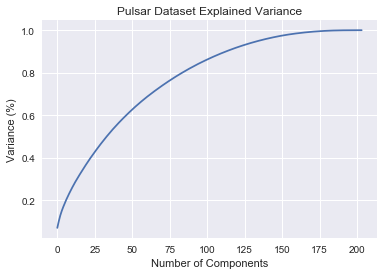

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 83)                13861     
_________________________________________________________________
dense_5 (Dense)              (None, 33)                2772      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 34        
Total params: 16,667
Trainable params: 16,667
Non-trainable params: 0
_________________________________________________________________
Epoch 1/125
1458/1458 [==============================] - 0s 274us/step - loss: 25628194820.0823 - mean_squared_error: 25628194820.0823
Epoch 2/125
1458/1458 [==============================] - 0s 136us/step - loss: 1117341472.7791 - mean_squared_error: 1117341472.7791
Epoch 3/125
1458/1458 [==============================] - 0s 167us/step - loss: 571280313.7339 - mean_squared_error: 571280313.7339
Epo

1458/1458 [==============================] - 0s 133us/step - loss: 244609974.8834 - mean_squared_error: 244609974.8834
Epoch 119/125
1458/1458 [==============================] - 0s 128us/step - loss: 243491019.8436 - mean_squared_error: 243491019.8436
Epoch 120/125
1458/1458 [==============================] - 0s 127us/step - loss: 241942919.3265 - mean_squared_error: 241942919.3265
Epoch 121/125
1458/1458 [==============================] - 0s 130us/step - loss: 240866275.5501 - mean_squared_error: 240866275.5501
Epoch 122/125
1458/1458 [==============================] - 0s 139us/step - loss: 239609345.0741 - mean_squared_error: 239609345.0741
Epoch 123/125
1458/1458 [==============================] - 0s 173us/step - loss: 238565187.3224 - mean_squared_error: 238565187.3224
Epoch 124/125
1458/1458 [==============================] - 0s 190us/step - loss: 237086276.0247 - mean_squared_error: 237086276.0247
Epoch 125/125
1458/1458 [==============================] - 0s 188us/step - loss: 23

In [23]:
import os

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Any results you write to the current directory are saved as output.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ThresholdedReLU
from keras import metrics
from sklearn.decomposition import PCA

# Importing the dataset
train = pd.read_csv('D:/news/train.csv')
test_x = pd.read_csv('D:/news/test.csv')

y_column = 'SalePrice'

# Remove outliers
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

# Split x and y
train_y = train[y_column]
train_x = train.drop([y_column], axis=1)

# Save id col from test set to append it at the end
test_id_col = test_x['Id'].values.tolist()

# Combine test and train set
df_x = pd.concat([train_x, test_x])

# Remove id columns
df_x = df_x.drop(['Id'], axis=1)

# Convert potential numerical  categorical data to numerical data
ordinal = [
    ('ExterQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('ExterCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('BsmtQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('BsmtCond',  ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('HeatingQC', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('KitchenQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('FireplaceQu', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('GarageQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('GarageCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('PoolQC', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5], lambda x: 0),
    ('Street', ['Pave', 'Grvl'], [1, 2], lambda x: 0),
    ('Alley', ['Pave', 'Grvl'], [1, 2], lambda x: 0),
    ('LotShape', ['IR3', 'IR2', 'IR1', 'Reg'], [1, 2, 3, 4], lambda x: 0),
    ('Utilities', ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], [0, 1, 2, 3], lambda x: 0),
    ('LandSlope', ['Sev', 'Mod', 'Gtl'], [1, 2, 3], lambda x: 0),
    ('BsmtExposure', ['No', 'Mn', 'Av', 'Gd'], [1, 2, 3, 4], lambda x: 0),
    ('BsmtFinType1', ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [1, 2, 3, 4, 5, 6], lambda x: 0),
    ('BsmtFinType2', ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [1, 2, 3, 4, 5, 6], lambda x: 0),
    ('GarageFinish', ['Unf', 'RFn', 'Fin'], [1, 2, 3], lambda x: 0),
#    ('PavedDrive', ['N', 'P', 'Y'], [1, 2, 3], lambda x: 0),
    ('Fence', ['MnWw', 'GdWo', 'MnPrv', 'GdPrv'], [1, 2, 3, 4], lambda x: 0)
]


def convert(df, ordinal):
    for ordinalData in ordinal:
        df[ordinalData[0]] = df[ordinalData[0]].fillna(ordinalData[3](df[ordinalData[0]]))
        df[ordinalData[0]] = df[ordinalData[0]].replace(ordinalData[1], ordinalData[2])
    return df


df_x = convert(df_x, ordinal=ordinal)


# Create dummies for object data
def to_dummies(df):
    objects = list(df.select_dtypes(include=['object']))
    return pd.get_dummies(df, columns=objects, drop_first=True)


df_x = to_dummies(df_x)


# Correct missing values
def prepare_missing_values(df):
    # Remove columns with more than 60% missing value,
    df = df.dropna(axis='columns', how='any', thresh=df_x.shape[0] * 0.6, subset=None, inplace=False)
    # Fill missing values with column median
    df = df.fillna(df_x.mean())
    # Remove columns with all the same value
    df = df.drop(df_x.std()[(df_x.std() == 0)].index, axis=1)
    return df


df_x = prepare_missing_values(df_x)


# Scale Data
def scale_data(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn_pandas import DataFrameMapper
    mapper = DataFrameMapper([(df.columns, StandardScaler())])
    scaled_features = mapper.fit_transform(df.copy(), 4)
    df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
    return df


df_x = scale_data(df_x)

# Split train and test set
train_prepared_x = df_x[:train.shape[0]]
test_prepared_x = df_x[train.shape[0]:]

pca = PCA()
pca.fit(train_prepared_x, train_y)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

variance = 0.99

nr_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= variance)

pca = PCA(n_components=nr_components)
pca.fit(train_prepared_x, train_y)

ann_train_x = pca.transform(train_prepared_x)
ann_test_x = pca.transform(test_prepared_x)

# Set seed for randomization
seed = 7
np.random.seed(seed)

# Create model
input_layer_nodes = ann_train_x.shape[1]
output_layer_nodes = 1


def create_model():
    m = Sequential()
    m.add(Dense(int(input_layer_nodes / 2), input_dim=input_layer_nodes, activation='relu'))
    m.add(Dense(int(input_layer_nodes / 5), activation=ThresholdedReLU(theta=1)))
    m.add(Dense(output_layer_nodes))
    m.compile(optimizer=keras.optimizers.Adadelta(), loss='mean_squared_error', metrics=[metrics.mse])
    return m


model = create_model()
model.summary()

history = model.fit(ann_train_x, train_y, epochs=125, batch_size=10)

prediction = model.predict(ann_test_x)

submission = pd.DataFrame()
submission['Id'] = test_id_col
submission['SalePrice'] = prediction
submission.to_csv('submission.csv', index=False)

print('Finished :-)')

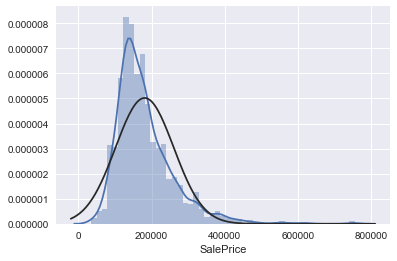

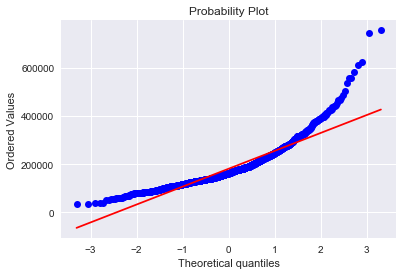

In [4]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

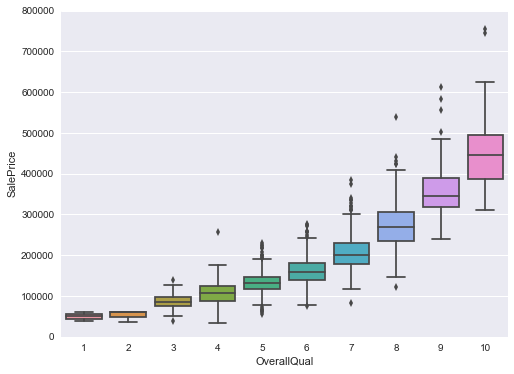

In [7]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

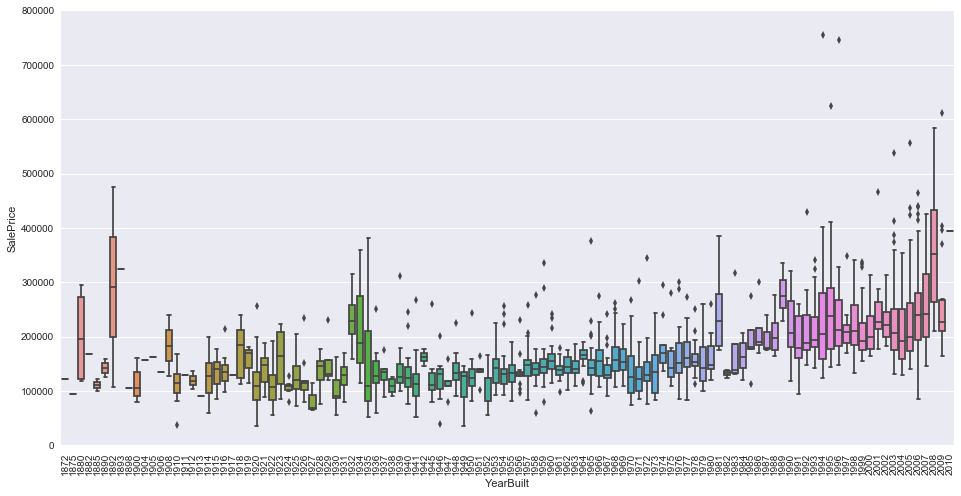

In [8]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);plt.xticks(rotation=90);

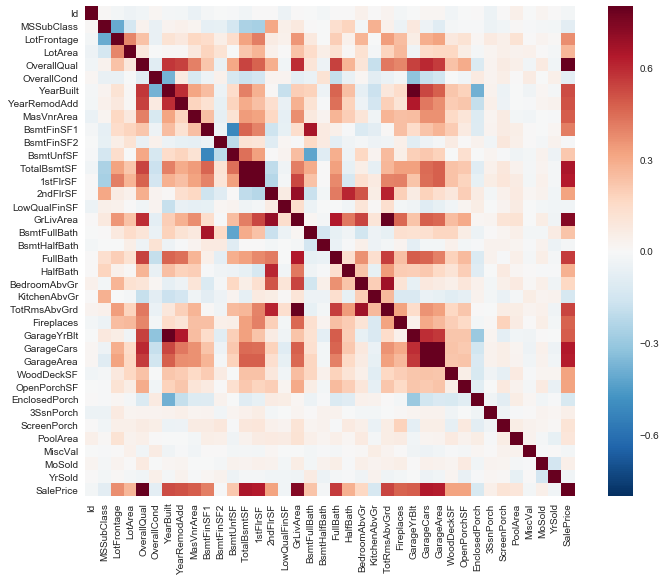

In [9]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

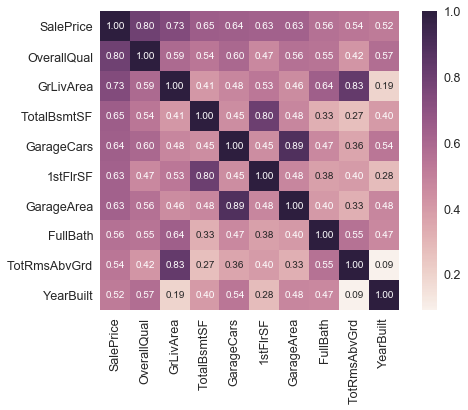

In [11]:
k = 10 #number ofvariables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
train['GrLivArea'][0:5]

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [16]:
train['HasBsmt']= pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [18]:
train['HasBsmt']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: HasBsmt, Length: 1460, dtype: int64